In [2]:
import pandas as pd
df = pd.read_csv("T1.csv", parse_dates=["Date/Time"], dayfirst=True)
print(df.head())

            Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0 2018-01-01 00:00:00           380.047791          5.311336   
1 2018-01-01 00:10:00           453.769196          5.672167   
2 2018-01-01 00:20:00           306.376587          5.216037   
3 2018-01-01 00:30:00           419.645905          5.659674   
4 2018-01-01 00:40:00           380.650696          5.577941   

   Theoretical_Power_Curve (KWh)  Wind Direction (°)  
0                     416.328908          259.994904  
1                     519.917511          268.641113  
2                     390.900016          272.564789  
3                     516.127569          271.258087  
4                     491.702972          265.674286  


# DATA VIZUALISATION

First few rows:
             Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0 2018-01-01 00:00:00           380.047791          5.311336   
1 2018-01-01 00:10:00           453.769196          5.672167   
2 2018-01-01 00:20:00           306.376587          5.216037   
3 2018-01-01 00:30:00           419.645905          5.659674   
4 2018-01-01 00:40:00           380.650696          5.577941   

   Theoretical_Power_Curve (KWh)  Wind Direction (°)  
0                     416.328908          259.994904  
1                     519.917511          268.641113  
2                     390.900016          272.564789  
3                     516.127569          271.258087  
4                     491.702972          265.674286  

Dataset info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date/

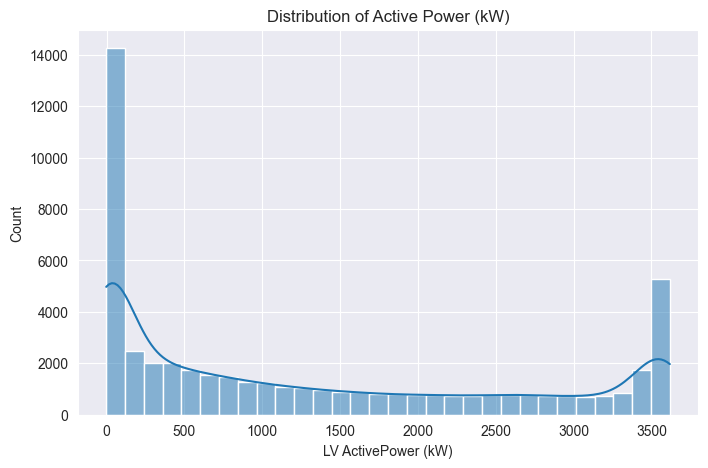

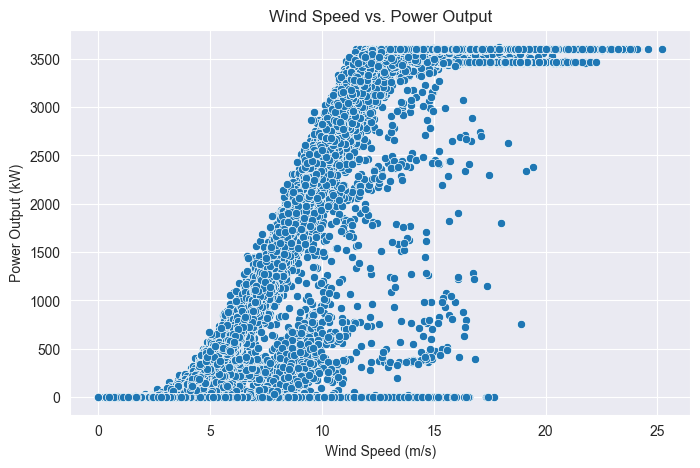

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("T1.csv", parse_dates=["Date/Time"], dayfirst=True)

# Quick overview of the dataset
print("First few rows:\n", df.head())

# Check data types and missing values
print("\nDataset info:\n")
df.info()

# Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())

# Summary statistics
print("\nDataset statistics:\n", df.describe())

# Visualizing the distribution of power output
plt.figure(figsize=(8,5))
sns.histplot(df["LV ActivePower (kW)"], bins=30, kde=True)
plt.title("Distribution of Active Power (kW)")
plt.show()

# Relationship between wind speed and power output
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Wind Speed (m/s)"], y=df["LV ActivePower (kW)"])
plt.title("Wind Speed vs. Power Output")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Power Output (kW)")
plt.show()


# DATA CLEANING

In [5]:
from sklearn.model_selection import train_test_split

# Drop rows with missing values
df = df.dropna()

# Select features (independent variables) and target variable
X = df[["Wind Speed (m/s)", "Wind Direction (°)", "Theoretical_Power_Curve (KWh)"]]
y = df["LV ActivePower (kW)"]

# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data size:", X_train.shape)
print("Test data size:", X_test.shape)

Training data size: (40424, 3)
Test data size: (10106, 3)


# Train and Compare Models

Model 1: Linear Regression

Linear Regression - MSE: 169505.14
Linear Regression - R²: 0.90


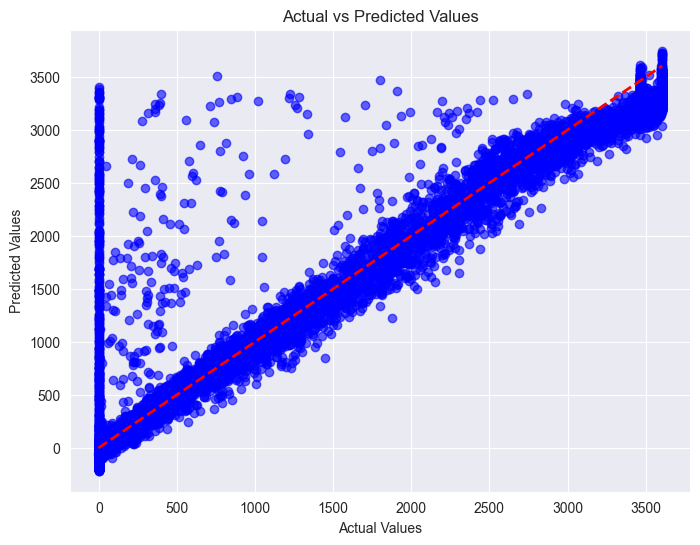

In [7]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression - MSE: {mse:.2f}")
print(f"Linear Regression - R²: {r2:.2f}")

# Plotting Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()


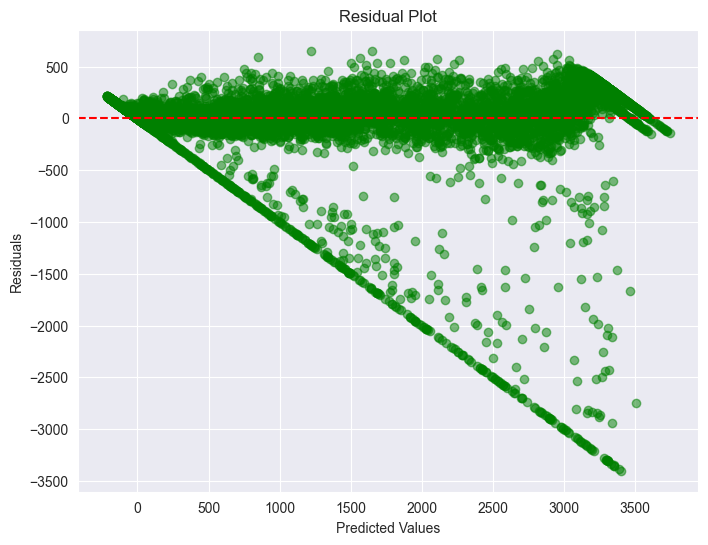

In [8]:
# Residual plot
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()


Model 2: Random Forest

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# initialize the random forest model
# random forest is chosen because it is an ensemble learning method that reduces overfitting compared to a single decision tree
# it works well with non-linear relationships and captures interactions between variables
rf_model = RandomForestRegressor(n_estimators=100, random_state=56)

# train the model on the training data
# this step fits multiple decision trees on different sub samples of the dataset and averages them to improve predictive accuracy
rf_model.fit(X_train, y_train)

# make predictions on the test set
# the model outputs the predicted power generation based on unseen wind speed, direction, and theoretical power curve values
y_pred_rf = rf_model.predict(X_test)

# evaluate the model using mean squared error (mse) and r² score
# mse measures the average squared difference between actual and predicted values (lower is better)
# r² score represents how well the model explains the variance in the data (closer to 1 is better)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# print model performance metrics
# mse is useful for assessing absolute prediction errors, while r² helps in understanding the proportion of variance captured by the model
print(f"random forest - mse: {mse_rf:.2f}")
print(f"random forest - r²: {r2_rf:.2f}")



random forest - mse: 171308.95
random forest - r²: 0.90


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# train gradient boosting regressor
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=56)

# parameter choices:
# - n_estimators=200: number of trees, higher values improve accuracy but increase training time
#   - more trees allow the model to capture complex patterns but may lead to overfitting
# - learning_rate=0.1: determines how much each tree contributes to the final prediction
#   - lower values (e.g., 0.01) improve generalization but require more trees
#   - higher values (e.g., 0.5) can lead to faster convergence but risk overfitting
# - random_state=56: ensures the same model is produced on each run for reproducibility

gb_model.fit(X_train, y_train)  # fit the model to the training data

# predict on test set
y_pred_gb = gb_model.predict(X_test)

# evaluate the model using mean squared error and r² score
mse_gb = mean_squared_error(y_test, y_pred_gb)  # measures average squared prediction error
r2_gb = r2_score(y_test, y_pred_gb)  # indicates how well the model explains variance in the target variable

# display performance metrics
print(f"Gradient Boosting - MSE: {mse_gb:.2f}, R²: {r2_gb:.2f}")

# compare all models
# printing mse and r² for all models to determine the best-performing one
print("\nUpdated Model Comparison:")
print(f"Linear Regression - MSE: {mse:.2f}, R²: {r2:.2f}")
print(f"Random Forest - MSE: {mse_rf:.2f}, R²: {r2_rf:.2f}")
print(f"Gradient Boosting - MSE: {mse_gb:.2f}, R²: {r2_gb:.2f}")



Linear Regression - MSE: 169505.14, R²: 0.90
Random Forest - MSE: 171308.95, R²: 0.90
Gradient Boosting - MSE: 146763.72, R²: 0.91

🔎 Updated Model Comparison:
Linear Regression   - MSE: 169505.14, R²: 0.90
Random Forest       - MSE: 171308.95, R²: 0.90
Gradient Boosting   - MSE: 146763.72, R²: 0.91


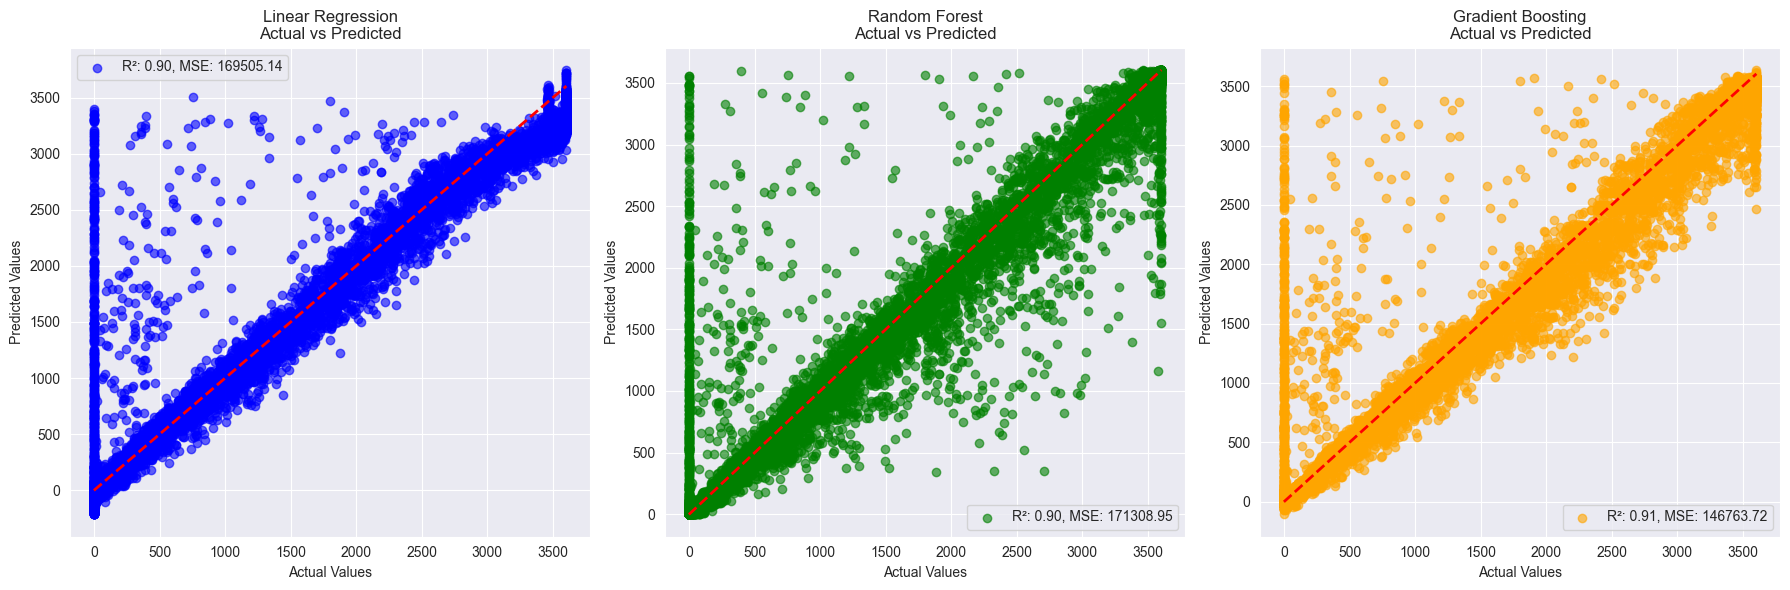

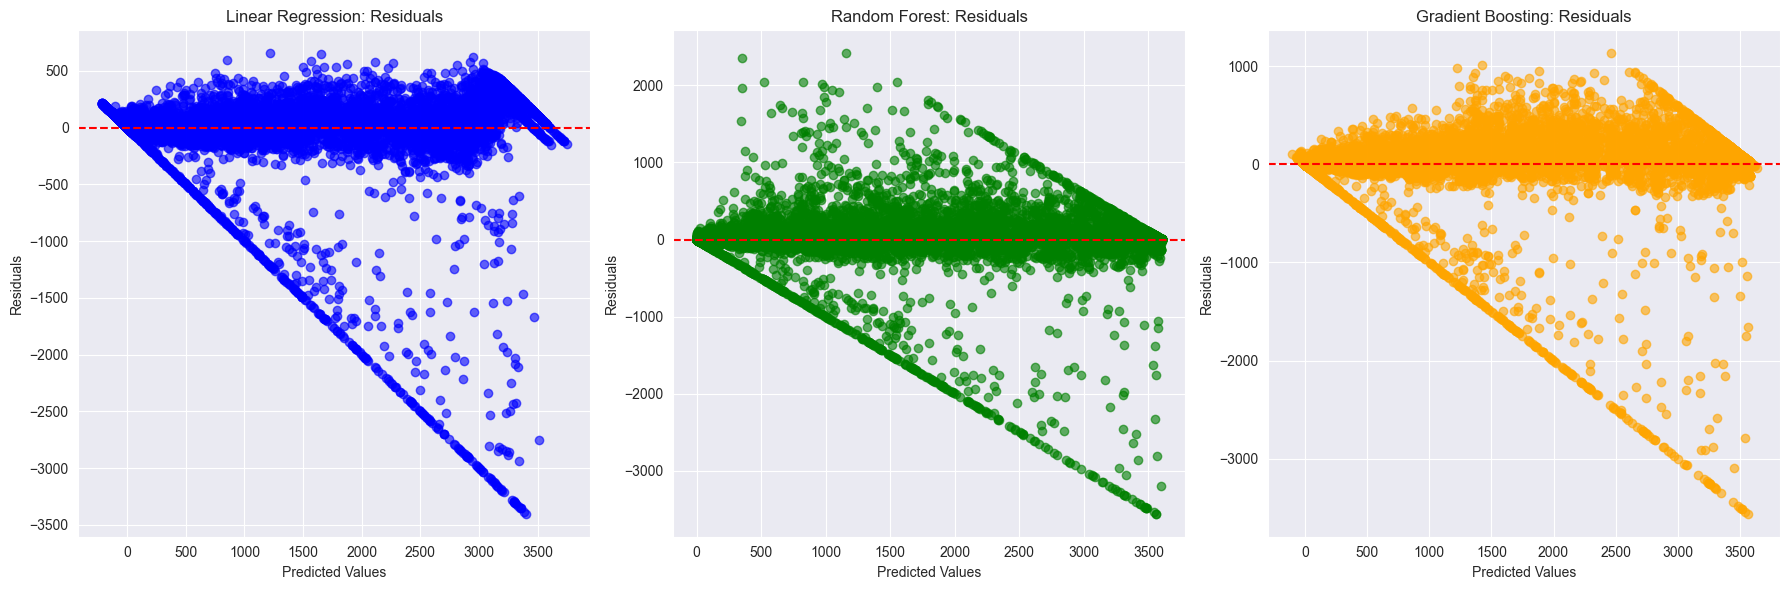

In [12]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# --- Linear Regression ---
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression - MSE: {mse_lr:.2f}, R²: {r2_lr:.2f}")

# --- Random Forest Regression ---
rf_model = RandomForestRegressor(n_estimators=100, random_state=56)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - MSE: {mse_rf:.2f}, R²: {r2_rf:.2f}")

# --- Gradient Boosting Regression ---
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=56)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print(f"Gradient Boosting - MSE: {mse_gb:.2f}, R²: {r2_gb:.2f}")

# --- Model Comparison Summary ---
print("\n🔎 Updated Model Comparison:")
print(f"Linear Regression   - MSE: {mse_lr:.2f}, R²: {r2_lr:.2f}")
print(f"Random Forest       - MSE: {mse_rf:.2f}, R²: {r2_rf:.2f}")
print(f"Gradient Boosting   - MSE: {mse_gb:.2f}, R²: {r2_gb:.2f}")

# --- Plot: Actual vs Predicted for All Models ---
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Linear Regression
axs[0].scatter(y_test, y_pred_lr, color='blue', alpha=0.6, label=f'R²: {r2_lr:.2f}, MSE: {mse_lr:.2f}')
axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axs[0].set_title('Linear Regression\nActual vs Predicted')
axs[0].set_xlabel('Actual Values')
axs[0].set_ylabel('Predicted Values')
axs[0].legend()
axs[0].grid(True)

# Random Forest
axs[1].scatter(y_test, y_pred_rf, color='green', alpha=0.6, label=f'R²: {r2_rf:.2f}, MSE: {mse_rf:.2f}')
axs[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axs[1].set_title('Random Forest\nActual vs Predicted')
axs[1].set_xlabel('Actual Values')
axs[1].set_ylabel('Predicted Values')
axs[1].legend()
axs[1].grid(True)

# Gradient Boosting
axs[2].scatter(y_test, y_pred_gb, color='orange', alpha=0.6, label=f'R²: {r2_gb:.2f}, MSE: {mse_gb:.2f}')
axs[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axs[2].set_title('Gradient Boosting\nActual vs Predicted')
axs[2].set_xlabel('Actual Values')
axs[2].set_ylabel('Predicted Values')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()

# --- Residual Plots for All Models ---
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Residuals for Linear Regression
axs[0].scatter(y_pred_lr, y_test - y_pred_lr, color='blue', alpha=0.6)
axs[0].axhline(y=0, color='red', linestyle='--')
axs[0].set_title('Linear Regression: Residuals')
axs[0].set_xlabel('Predicted Values')
axs[0].set_ylabel('Residuals')
axs[0].grid(True)

# Residuals for Random Forest
axs[1].scatter(y_pred_rf, y_test - y_pred_rf, color='green', alpha=0.6)
axs[1].axhline(y=0, color='red', linestyle='--')
axs[1].set_title('Random Forest: Residuals')
axs[1].set_xlabel('Predicted Values')
axs[1].set_ylabel('Residuals')
axs[1].grid(True)

# Residuals for Gradient Boosting
axs[2].scatter(y_pred_gb, y_test - y_pred_gb, color='orange', alpha=0.6)
axs[2].axhline(y=0, color='red', linestyle='--')
axs[2].set_title('Gradient Boosting: Residuals')
axs[2].set_xlabel('Predicted Values')
axs[2].set_ylabel('Residuals')
axs[2].grid(True)

plt.tight_layout()
plt.show()


Model 3: Gradient Boosting Regressor

In [21]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# train gradient boosting regressor
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=56)

# parameter choices:
# - n_estimators=200: number of trees, higher values improve accuracy but increase training time
#   - more trees allow the model to capture complex patterns but may lead to overfitting
# - learning_rate=0.1: determines how much each tree contributes to the final prediction
#   - lower values (e.g., 0.01) improve generalization but require more trees
#   - higher values (e.g., 0.5) can lead to faster convergence but risk overfitting
# - random_state=56: ensures the same model is produced on each run for reproducibility

gb_model.fit(X_train, y_train)  # fit the model to the training data

# predict on test set
y_pred_gb = gb_model.predict(X_test)

# evaluate the model using mean squared error and r² score
mse_gb = mean_squared_error(y_test, y_pred_gb)  # measures average squared prediction error
r2_gb = r2_score(y_test, y_pred_gb)  # indicates how well the model explains variance in the target variable

# display performance metrics
print(f"Gradient Boosting - MSE: {mse_gb:.2f}, R²: {r2_gb:.2f}")

# compare all models
# printing mse and r² for all models to determine the best-performing one
print("\nUpdated Model Comparison:")
print(f"Linear Regression - MSE: {mse:.2f}, R²: {r2:.2f}")
print(f"Random Forest - MSE: {mse_rf:.2f}, R²: {r2_rf:.2f}")
print(f"Gradient Boosting - MSE: {mse_gb:.2f}, R²: {r2_gb:.2f}")



Gradient Boosting - MSE: 146763.72, R²: 0.91

Updated Model Comparison:
Linear Regression - MSE: 169505.14, R²: 0.90
Random Forest - MSE: 171308.95, R²: 0.90
Gradient Boosting - MSE: 146763.72, R²: 0.91


standardization

In [18]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

# standardize the features to have zero mean and unit variance
# this helps neural networks learn efficiently by preventing large differences in feature scales
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # fit the scaler on training data and transform
X_test_scaled = scaler.transform(X_test)  # transform test data using the same scaler

# define the neural network architecture
nn_model = keras.Sequential([
    keras.layers.Dense(128, activation="relu", input_shape=(X_train_scaled.shape[1],)),  # first hidden layer with 128 neurons
    keras.layers.Dense(64, activation="relu"),  # second hidden layer with 64 neurons
    keras.layers.Dense(32, activation="relu"),  # third hidden layer with 32 neurons
    keras.layers.Dense(1)  # output layer with 1 neuron (since this is a regression task)
])

# explanation:
# - "dense" layers are fully connected layers where each neuron connects to all neurons in the previous layer
# - "relu" (rectified linear unit) is used to introduce non-linearity and avoid vanishing gradient problems
# - the last layer has a single neuron because we are predicting a continuous numerical value (power output)

# compile the model using the adam optimizer and mean squared error loss
nn_model.compile(optimizer="adam", loss="mse")

# explanation:
# - "adam" optimizer dynamically adjusts learning rates, making it efficient for deep learning tasks
# - "mse" (mean squared error) is used for regression since it penalizes large prediction errors

# train the neural network
nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test_scaled, y_test))

# explanation:
# - "epochs=50" means the model will go through the entire dataset 50 times during training
# - "batch_size=32" splits data into batches of 32 samples to improve efficiency and avoid memory overload
# - "validation_data" allows monitoring model performance on unseen data during training

# evaluate the trained model on the test set
nn_mse = nn_model.evaluate(X_test_scaled, y_test)
print(f"Neural Network - MSE: {nn_mse:.2f}")

# explanation:
# - "evaluate" calculates mse on test data to assess performance
# - lower mse indicates better prediction accuracy


Epoch 1/50


D:\Documenti\NTNU courses\Machine Learning for Engineers\ml\my_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1264/1264 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1258902.6250 - val_loss: 166732.6719
Epoch 2/50
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 159702.4688 - val_loss: 165101.7969
Epoch 3/50
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 163379.2812 - val_loss: 162938.0781
Epoch 4/50
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 149635.7500 - val_loss: 162745.9375
Epoch 5/50
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 152146.0312 - val_loss: 164770.4688
Epoch 6/50
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 159193.8594 - val_loss: 168221.1875
Epoch 7/50
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 148542.5469 - val_loss: 166383.0312
Epoch 8/50
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 154394.5938 - val_loss: 159773.8906
Epoch 9/50
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 149249.3594 - val_loss: 159993.4688
Epoch 10/50
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 151764.8281 - val_loss: 159239.1406
Epoch 11/50
1264/1264 ━━━━━━━

Comparison between models

316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step
Neural Network - R²: 0.91


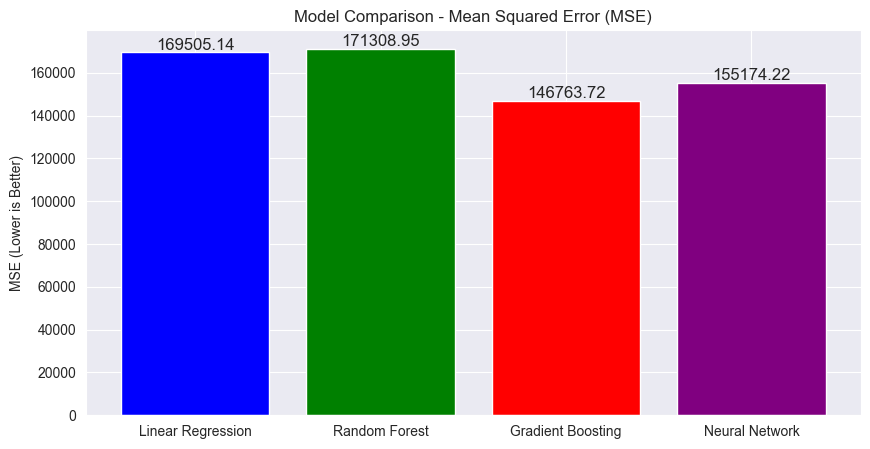

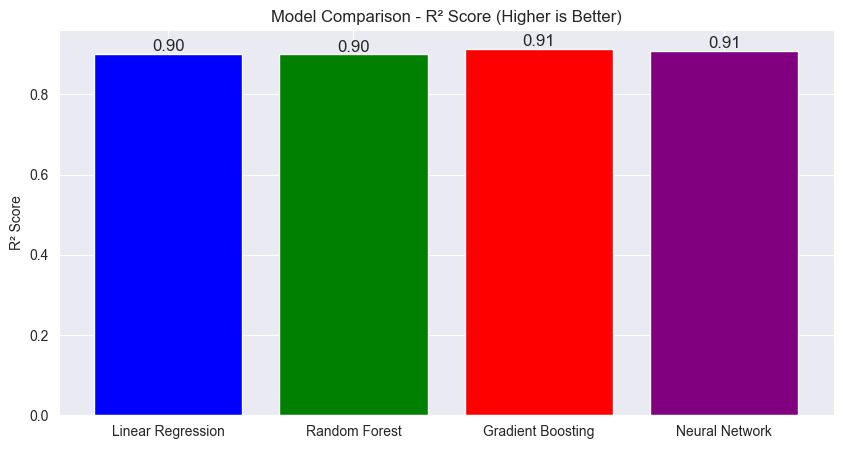

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Compute predictions for the neural network
y_pred_nn = nn_model.predict(X_test_scaled).flatten()  # Ensure shape is correct

# Compute R² for Neural Network
ss_res = np.sum((y_test - y_pred_nn) ** 2)
ss_tot = np.sum((y_test - np.mean(y_test)) ** 2)
r2_nn = 1 - (ss_res / ss_tot)

print(f"Neural Network - R²: {r2_nn:.2f}")

# Store model names and results
models = ["Linear Regression", "Random Forest", "Gradient Boosting", "Neural Network"]
mse_values = [mse, mse_rf, mse_gb, nn_mse]
r2_values = [r2, r2_rf, r2_gb, r2_nn]

# Plot MSE Comparison
plt.figure(figsize=(10, 5))
bars = plt.bar(models, mse_values, color=['blue', 'green', 'red', 'purple'])
plt.title("Model Comparison - Mean Squared Error (MSE)")
plt.ylabel("MSE (Lower is Better)")

# Add values on top of bars
for bar, value in zip(bars, mse_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{value:.2f}", ha='center', va='bottom', fontsize=12)

plt.show()

# Plot R² Score Comparison
plt.figure(figsize=(10, 5))
bars = plt.bar(models, r2_values, color=['blue', 'green', 'red', 'purple'])
plt.title("Model Comparison - R² Score (Higher is Better)")
plt.ylabel("R² Score")

# Add values on top of bars
for bar, value in zip(bars, r2_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{value:.2f}", ha='center', va='bottom', fontsize=12)

plt.show()



Plots and visual comparison

Linear Regression - MSE: 169505.14, R²: 0.90
Random Forest - MSE: 171308.95, R²: 0.90
Gradient Boosting - MSE: 146763.72, R²: 0.91
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step
Neural Network - MSE: 155174.25, R²: 0.91

🔎 Updated Model Comparison:
Linear Regression   - MSE: 169505.14, R²: 0.90
Random Forest       - MSE: 171308.95, R²: 0.90
Gradient Boosting   - MSE: 146763.72, R²: 0.91
Neural Network      - MSE: 155174.25, R²: 0.91


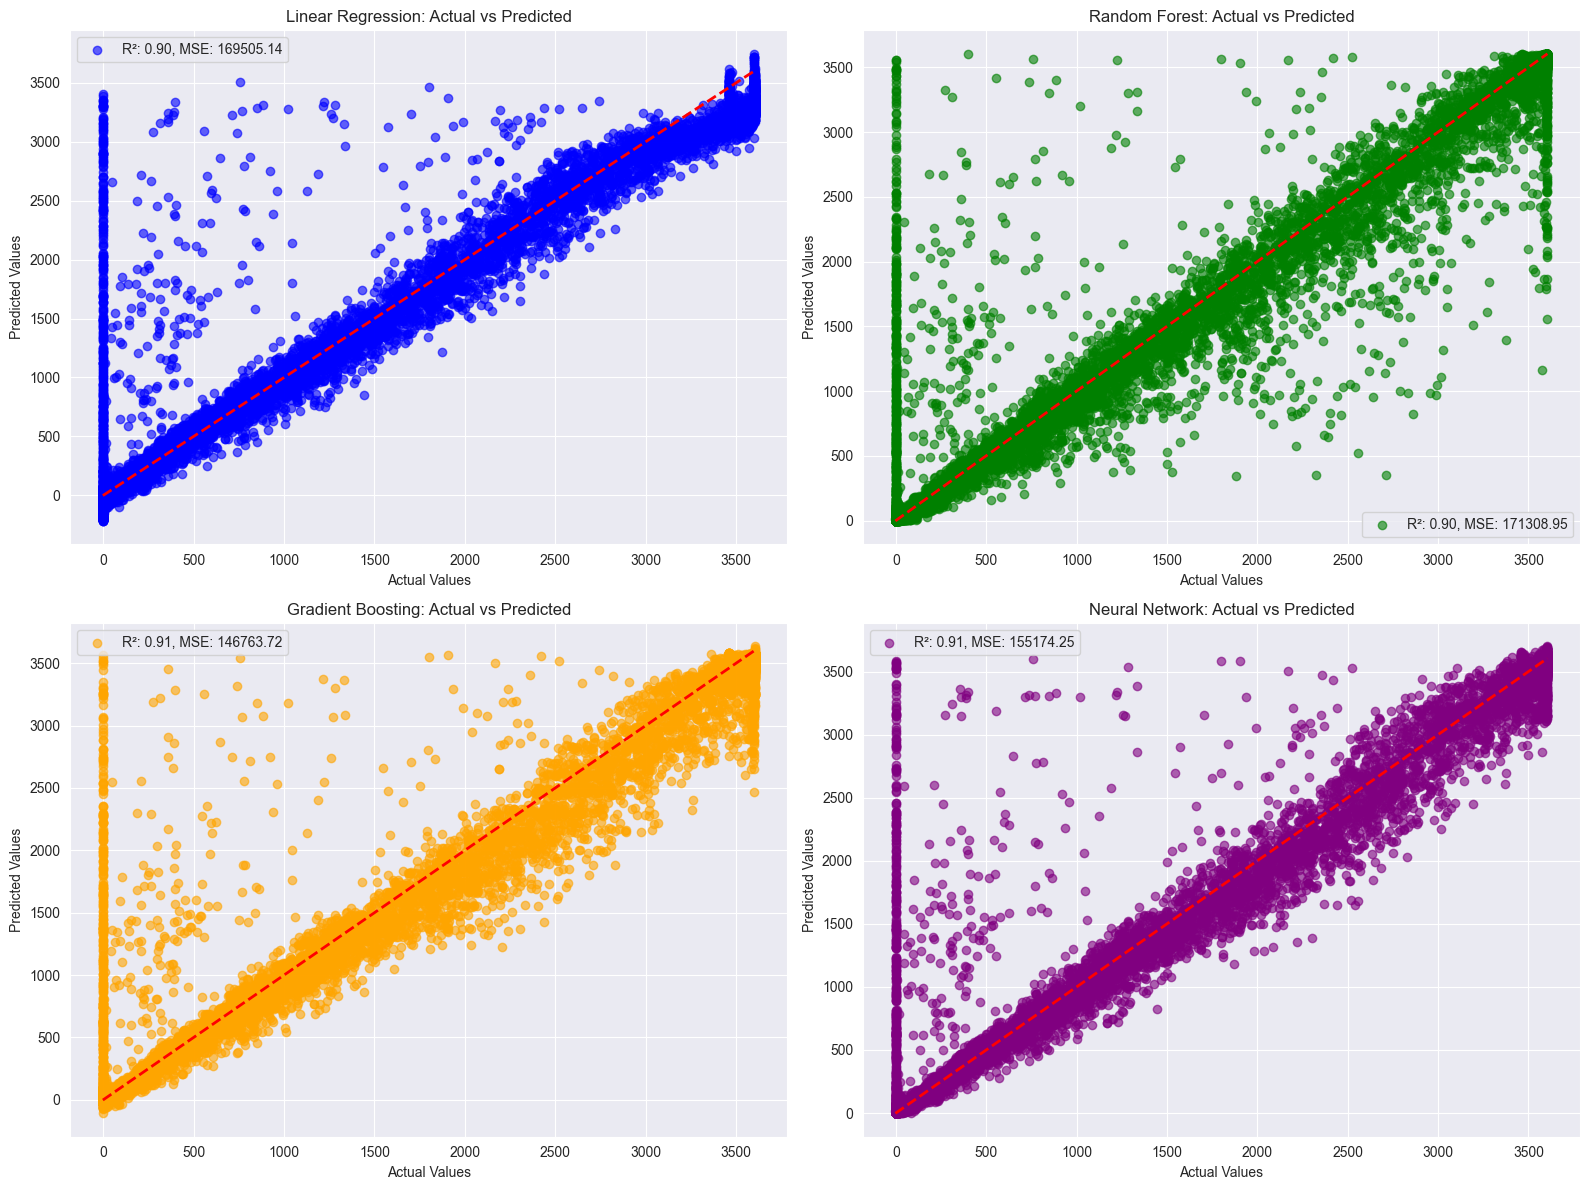

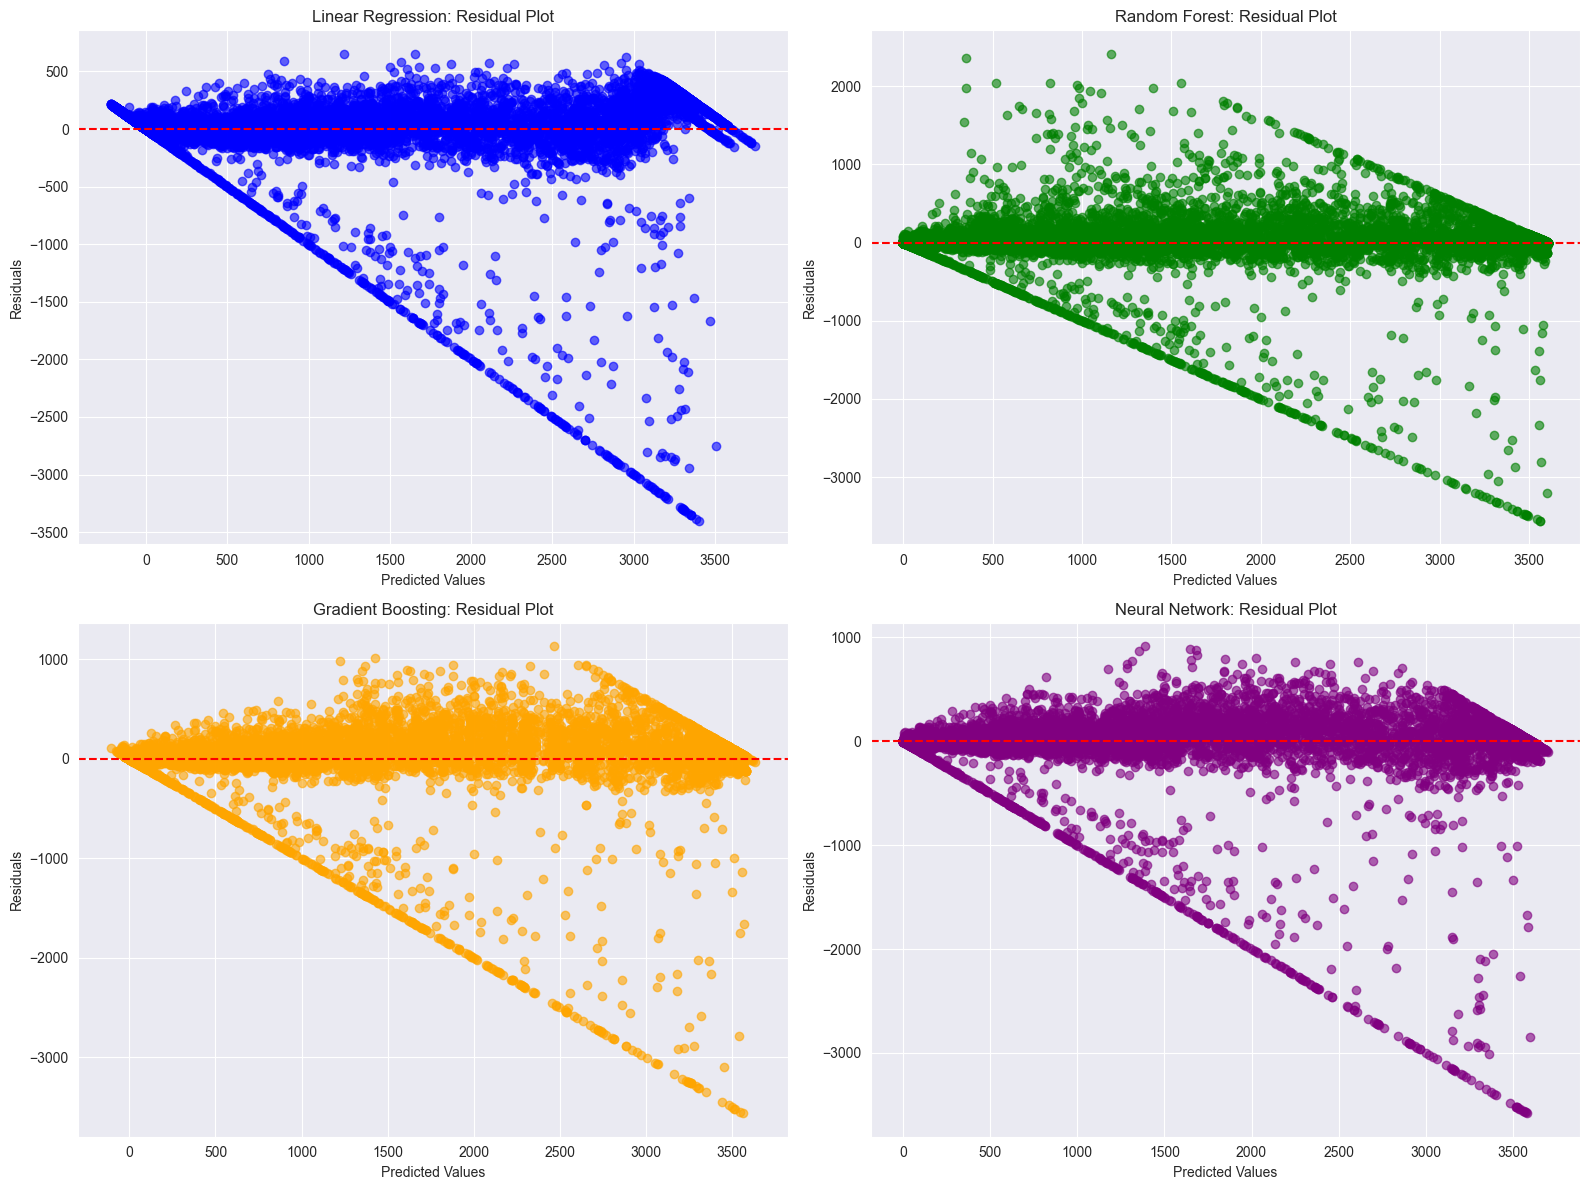

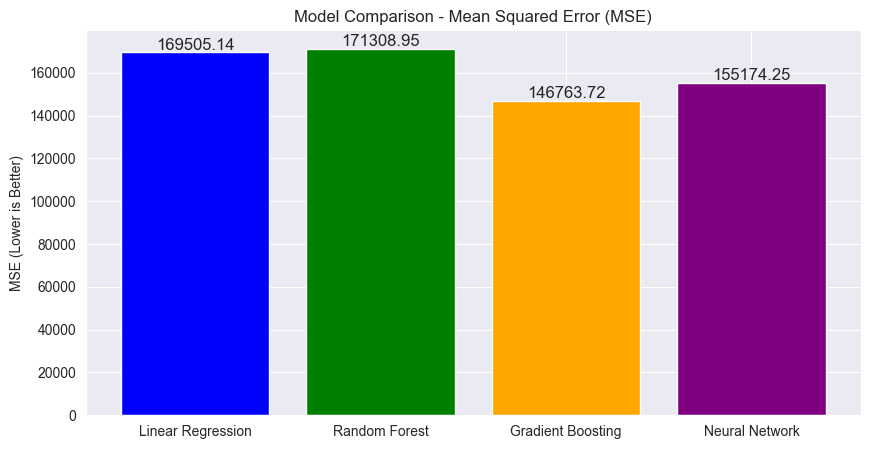

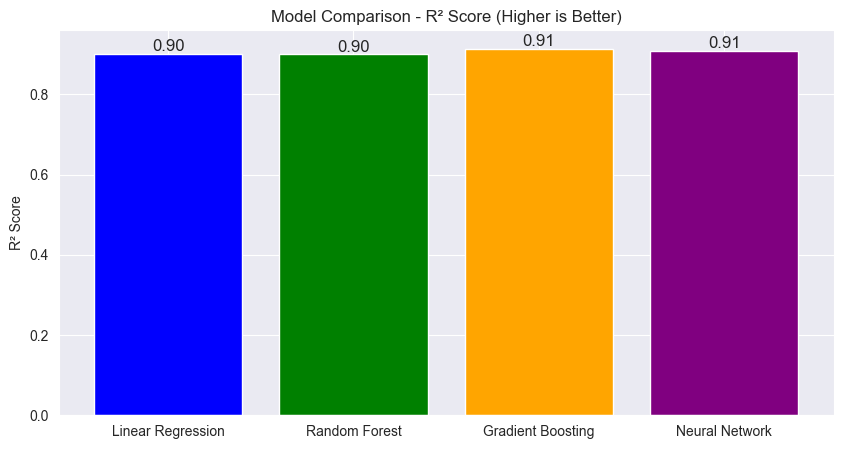

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# --- Linear Regression ---
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression - MSE: {mse_lr:.2f}, R²: {r2_lr:.2f}")

# --- Random Forest Regression ---
rf_model = RandomForestRegressor(n_estimators=100, random_state=56)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - MSE: {mse_rf:.2f}, R²: {r2_rf:.2f}")

# --- Gradient Boosting Regression ---
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=56)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print(f"Gradient Boosting - MSE: {mse_gb:.2f}, R²: {r2_gb:.2f}")

# --- Neural Network Predictions ---
y_pred_nn = nn_model.predict(X_test_scaled).flatten()  # Flatten if shape mismatch
nn_mse = mean_squared_error(y_test, y_pred_nn)
ss_res = np.sum((y_test - y_pred_nn) ** 2)
ss_tot = np.sum((y_test - np.mean(y_test)) ** 2)
r2_nn = 1 - (ss_res / ss_tot)
print(f"Neural Network - MSE: {nn_mse:.2f}, R²: {r2_nn:.2f}")

# --- Model Comparison Summary ---
print("\n🔎 Updated Model Comparison:")
print(f"Linear Regression   - MSE: {mse_lr:.2f}, R²: {r2_lr:.2f}")
print(f"Random Forest       - MSE: {mse_rf:.2f}, R²: {r2_rf:.2f}")
print(f"Gradient Boosting   - MSE: {mse_gb:.2f}, R²: {r2_gb:.2f}")
print(f"Neural Network      - MSE: {nn_mse:.2f}, R²: {r2_nn:.2f}")

# --- Plot: Actual vs Predicted for All Models ---
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

models = ["Linear Regression", "Random Forest", "Gradient Boosting", "Neural Network"]
y_preds = [y_pred_lr, y_pred_rf, y_pred_gb, y_pred_nn]
r2_values = [r2_lr, r2_rf, r2_gb, r2_nn]
mse_values = [mse_lr, mse_rf, mse_gb, nn_mse]
colors = ['blue', 'green', 'orange', 'purple']

for i, ax in enumerate(axs.flatten()):
    ax.scatter(y_test, y_preds[i], color=colors[i], alpha=0.6, label=f'R²: {r2_values[i]:.2f}, MSE: {mse_values[i]:.2f}')
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    ax.set_title(f'{models[i]}: Actual vs Predicted')
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

# --- Residual Plots for All Models ---
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

for i, ax in enumerate(axs.flatten()):
    residuals = y_test - y_preds[i]
    ax.scatter(y_preds[i], residuals, color=colors[i], alpha=0.6)
    ax.axhline(y=0, color='red', linestyle='--')
    ax.set_title(f'{models[i]}: Residual Plot')
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Residuals')
    ax.grid(True)

plt.tight_layout()
plt.show()

# --- MSE Comparison Bar Chart ---
plt.figure(figsize=(10, 5))
bars = plt.bar(models, mse_values, color=colors)
plt.title("Model Comparison - Mean Squared Error (MSE)")
plt.ylabel("MSE (Lower is Better)")
for bar, value in zip(bars, mse_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{value:.2f}", ha='center', va='bottom', fontsize=12)
plt.show()

# --- R² Score Comparison Bar Chart ---
plt.figure(figsize=(10, 5))
bars = plt.bar(models, r2_values, color=colors)
plt.title("Model Comparison - R² Score (Higher is Better)")
plt.ylabel("R² Score")
for bar, value in zip(bars, r2_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{value:.2f}", ha='center', va='bottom', fontsize=12)
plt.show()


Optimisaton : Finding best wind conditions for maximum power

In [17]:
import numpy as np

# Generate wind conditions
wind_speeds = np.linspace(df["Wind Speed (m/s)"].min(), df["Wind Speed (m/s)"].max(), 50)
wind_directions = np.linspace(df["Wind Direction (°)"].min(), df["Wind Direction (°)"].max(), 50)

# Create grid
grid = np.array(np.meshgrid(wind_speeds, wind_directions)).T.reshape(-1, 2)

# Predict power output for each combination
grid_df = pd.DataFrame(grid, columns=["Wind Speed (m/s)", "Wind Direction (°)"])
grid_df["Theoretical_Power_Curve (KWh)"] = np.mean(df["Theoretical_Power_Curve (KWh)"])

# Predict using Random Forest
grid_df["Predicted Power (kW)"] = rf_model.predict(grid_df)

# Find the best wind speed and direction
optimal_conditions = grid_df.loc[grid_df["Predicted Power (kW)"].idxmax()]
print("Optimal Wind Conditions for Maximum Power Generation:")
print(optimal_conditions)


Optimal Wind Conditions for Maximum Power Generation:
Wind Speed (m/s)                   12.345801
Wind Direction (°)                352.650700
Theoretical_Power_Curve (KWh)    1492.175463
Predicted Power (kW)             1715.284745
Name: 1248, dtype: float64
